In [1]:
## 라이브러리 로딩

import pandas as pd # 판다스 
import numpy as np # 넘파이
import glob # 파일 여러개 불러올 때
import time, datetime
from datetime import datetime

import re # 정규표현식
import csv # 파일로 저장하기 위한 툴

import ast # Abstrac Syntex Tree - 스트링 처리된 리스트를 리스트로 다시 리턴할때
from tqdm import tqdm, trange
from tqdm import tqdm_notebook
from time import sleep

# 토크나이징 라이브러리
import MeCab
m = MeCab.Tagger('-d /usr/local/lib/mecab/dic/mecab-ko-dic')
from konlpy.tag import Mecab
mecab = Mecab()

In [2]:
import gensim

In [3]:
df = pd.read_csv("predata.csv", encoding = 'utf8', engine='python')

In [4]:
df.drop('Unnamed: 0', axis=1,inplace=True)

In [5]:
%%time

tokens_all = []

for i in list(df["contents_all"]):
    k = mecab.nouns(i)
    tokens = []    
    for j in range(len(k)):
        if len(k[j]) > 1:
            tokens.append(k[j])
        else:
            continue
    tokens_all.append(tokens)
    
print(tokens_all[:10])

[['아바투르', '유저', '하나', '아바투르', '유저', '하나', '하나무라', '이것', '자체', '그게', '목적', '아바투르', '화물', '민폐', '대전', '일반', '등급', '고르지', '아바투르', '제한', '해결', '초갈', '상황', '발생', '이건', '아바투르'], ['매칭', '시스템', '생각', '문제', '매칭', '연패', '처사', '며칠', '연승', '건가요', '팀원', '적군', '플레이어', '매칭', '팀원', '적과', '히어로즈', '오브', '스톰', '캐리', '작용', '게임', '플레이어', '경험', '공유', '때문', '혼자', '성장', '캐리', '개념', '혼자', '딴짓', '팀원', '영향', '이야기', '초보자', '팀원', '게임', '게임', '레이팅', '유저', '공평', '처사', '플레이', '팀원', '때문', '연속', '패배', '실망감', '우리', '생각', '매칭', '승부', '승패', '허탈', '승부', '게임', '승부', '조합', '승패', '결정', '게임', '적군', '아군', '초보', '게임', '중국어', '닉네임', '승패', '게임', '제게', '공정', '세계', '아시아', '유저', '게임', '권리', '서로', '실력', '감탄', '승부', '패배', '아군', '책망', '상대', '실력', '감탄', '게임', '지금', '매칭', '시스템', '문제', '여러분', '시행착오', '믿음', '해결책', '모두', '히오스'], ['매칭', '때문', '게임', '강등전', '매칭', '시스템', '동안', '블리자드', '히오스', '사랑', '요즘', '인성', '파탄', '정도', '지경', '매칭', '밸런스', '시스템', '게임', '욕구', '사랑', '올해'], ['아나', '스킨', '관련', '스킨', '살무사', '아나', '수면', '고정', '스킨', '처음', '스킨', '대로', '

In [6]:
tokens_df = pd.DataFrame({"tokens":tokens_all})

In [7]:
# 불용어 제거 함수 정의

def remove_stopwords(text):
    stops = ['같은', '건가요', '겁니다', '것은', '건데', '것입니다','결국','경우','그것','그렇', '그게',
             '그러나', '그런', '그리고', '년도', '대한', '때문', '많은', '말하', '못하', '뭔가',
             '본인', '사실', '생각', '서로', '이거', '이게', '아니', '아무', '어디', '어떤', '언제', '없는', '없습니다',
             '여기', '여러분', '예전', '오늘', '우리', '위한', '위해', '이게', '이런', '이번', '이후,'
             '있는', '있습니다', '자신', '저거', '저번', '정도', '하고', '하는','한다','합니다',
            '누가', '이건', '자체', '건지', '대신', '지금', '그때', '만약', '무엇', '요즘', '완전',
            '녀석', '옛날', '얼마', '뭔가요', '근대', '안녕', '요새', '저기', '나중', '걸로', '이걸','그걸', '당시',
            '건가', '이제', '저건', '보통', '당신', '은근', '등등', '누구', '인데', '당장', '이때', '거기', '여긴',
            '저희', '대체','저게', '뭔지','맞음', '따위', '그거', '그건', '가요', '누군가', '진짜', '이것', '히오스',]
    
    # Stopwords 불용어 제거
    meaningful_words = [w for w in text if not w in stops]
    meaningful_list =  ''.join(str(meaningful_words))
    return ast.literal_eval(meaningful_list)

In [106]:
### 워드투벡에 적용할 리스트에 대한 단어들 처리


total = tqdm_notebook(range(153208))

for i in total:
    tokens_df['tokens'].iloc[i] = remove_stopwords(tokens_df['tokens'].iloc[i])

In [108]:
tokens_df['tokens']

0         [아바투르, 유저, 하나, 아바투르, 유저, 하나, 하나무라, 목적, 아바투르, 화...
1         [매칭, 시스템, 문제, 매칭, 연패, 처사, 며칠, 연승, 팀원, 적군, 플레이어...
2         [매칭, 게임, 강등전, 매칭, 시스템, 동안, 블리자드, 사랑, 인성, 파탄, 지...
3         [아나, 스킨, 관련, 스킨, 살무사, 아나, 수면, 고정, 스킨, 처음, 스킨, ...
4         [승률, 집착, 매칭, 밸런스, 파괴, 무간지옥, 승률, 조합, 사이, 개판, 이상...
5         [영웅, 리그, 매칭, 대만, 대만인, 새끼, 매칭, 머저리, 새끼, 영웅, 리그,...
6         [신영웅, 기존, 영웅, 신영웅, 기존, 영웅, 발리라, 리메이크, 은신, 패치, ...
7         [리메이크, 삭제, 광도, 리메이크, 하나, 리메이크, 블랙하트, 리메이크, 삭제,...
8         [영웅, 리그, 개선, 이전, 영웅, 리그, 문제, 정리, 가지, 대전, 시점, 배...
9                      [영웅, 선택, 버그, 영웅, 선택, 시작, 영웅, 시작, 최근]
10                                   [하나무라, 리메이크, 강제, 리메이크]
11                             [매칭, 따구, 연패, 연패, 승률, 매칭, 짜증]
12        [수집, 미확인, 목록, 숫자, 표시, 현상, 영웅, 스킨, 탈것, 표기, 미확인,...
13        [위치, 시청자, 영웅, 리그, 트롤, 유저, 제재, 영웅, 리그, 위치, 스트리,...
14                         [화이트메인, 화이트메인, 게임, 플레이, 혐오감, 조장]
15        [장애, 새끼, 란데, 디자인, 병신, 이따위, 디자인, 오브, 스톰, 바꾸, 영웅...
16                                      

In [109]:
word2vec_list = tokens_df["tokens"].values.tolist()

In [110]:
word2vec_list[:10]

[['아바투르',
  '유저',
  '하나',
  '아바투르',
  '유저',
  '하나',
  '하나무라',
  '목적',
  '아바투르',
  '화물',
  '민폐',
  '대전',
  '일반',
  '등급',
  '고르지',
  '아바투르',
  '제한',
  '해결',
  '초갈',
  '상황',
  '발생',
  '아바투르'],
 ['매칭',
  '시스템',
  '문제',
  '매칭',
  '연패',
  '처사',
  '며칠',
  '연승',
  '팀원',
  '적군',
  '플레이어',
  '매칭',
  '팀원',
  '적과',
  '히어로즈',
  '오브',
  '스톰',
  '캐리',
  '작용',
  '게임',
  '플레이어',
  '경험',
  '공유',
  '혼자',
  '성장',
  '캐리',
  '개념',
  '혼자',
  '딴짓',
  '팀원',
  '영향',
  '이야기',
  '초보자',
  '팀원',
  '게임',
  '게임',
  '레이팅',
  '유저',
  '공평',
  '처사',
  '플레이',
  '팀원',
  '연속',
  '패배',
  '실망감',
  '매칭',
  '승부',
  '승패',
  '허탈',
  '승부',
  '게임',
  '승부',
  '조합',
  '승패',
  '결정',
  '게임',
  '적군',
  '아군',
  '초보',
  '게임',
  '중국어',
  '닉네임',
  '승패',
  '게임',
  '제게',
  '공정',
  '세계',
  '아시아',
  '유저',
  '게임',
  '권리',
  '실력',
  '감탄',
  '승부',
  '패배',
  '아군',
  '책망',
  '상대',
  '실력',
  '감탄',
  '게임',
  '매칭',
  '시스템',
  '문제',
  '시행착오',
  '믿음',
  '해결책',
  '모두'],
 ['매칭',
  '게임',
  '강등전',
  '매칭',
  '시스템',
  '동안',
  '블리자드',
  '사랑',
  '인성',
  '파탄',
  

In [11]:
from gensim.models import word2vec

In [67]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(word2vec_list, min_count=200, size = 100, window=2, sg=1, sample= 1e-3)

2018-10-23 20:15:54,388 : INFO : collecting all words and their counts
2018-10-23 20:15:54,393 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-23 20:15:54,543 : INFO : PROGRESS: at sentence #10000, processed 252334 words, keeping 12648 word types
2018-10-23 20:15:54,714 : INFO : PROGRESS: at sentence #20000, processed 393705 words, keeping 17614 word types
2018-10-23 20:15:54,802 : INFO : PROGRESS: at sentence #30000, processed 515870 words, keeping 21346 word types
2018-10-23 20:15:54,913 : INFO : PROGRESS: at sentence #40000, processed 645930 words, keeping 24164 word types
2018-10-23 20:15:54,991 : INFO : PROGRESS: at sentence #50000, processed 769228 words, keeping 26579 word types
2018-10-23 20:15:55,056 : INFO : PROGRESS: at sentence #60000, processed 885513 words, keeping 28552 word types
2018-10-23 20:15:55,122 : INFO : PROGRESS: at sentence #70000, processed 1005666 words, keeping 30488 word types
2018-10-23 20:15:55,186 : INFO : PROGRESS: at

In [68]:
model.init_sims(replace=True)

model_name = 'word2vecTest'

model.save(model_name)

# 단어 사전 수
len(model.wv.vocab)

2018-10-23 20:16:28,757 : INFO : precomputing L2-norms of word weight vectors
2018-10-23 20:16:28,792 : INFO : saving Word2Vec object under word2vecTest, separately None
2018-10-23 20:16:28,794 : INFO : not storing attribute syn0norm
2018-10-23 20:16:28,796 : INFO : not storing attribute cum_table
2018-10-23 20:16:28,844 : INFO : saved word2vecTest


1633

In [69]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g
from matplotlib import rc
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

rc('font', family='AppleGothic')


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

2018-10-23 20:16:45,169 : INFO : loading Doc2Vec object from word2vecTest
2018-10-23 20:16:45,196 : INFO : loading wv recursively from word2vecTest.wv.* with mmap=None
2018-10-23 20:16:45,198 : INFO : setting ignored attribute syn0norm to None
2018-10-23 20:16:45,200 : INFO : setting ignored attribute cum_table to None
2018-10-23 20:16:45,202 : INFO : loaded word2vecTest


In [70]:
model = g.Doc2Vec.load(model_name)

# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)

# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])

Feature의 길이 1633
[-0.07607438  0.1335704   0.08788504  0.17561021 -0.02882955  0.00528029
  0.08775999 -0.15387398  0.06445403 -0.02018611]


In [71]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.shape

(100, 2)

In [72]:
df.head(20)

,x,y
판단,-109.269096,-171.519900
아군,-24.701271,-28.996323
장애,76.996585,-4.652045
잠수,-25.878290,94.532701
이벤트,37.955799,1.737745
카이,-38.549046,-35.365683
선수,49.340425,35.632906
초딩,2.562748,23.600435
뭔지,-100.183094,-87.058585
피시방,33.652087,19.479242


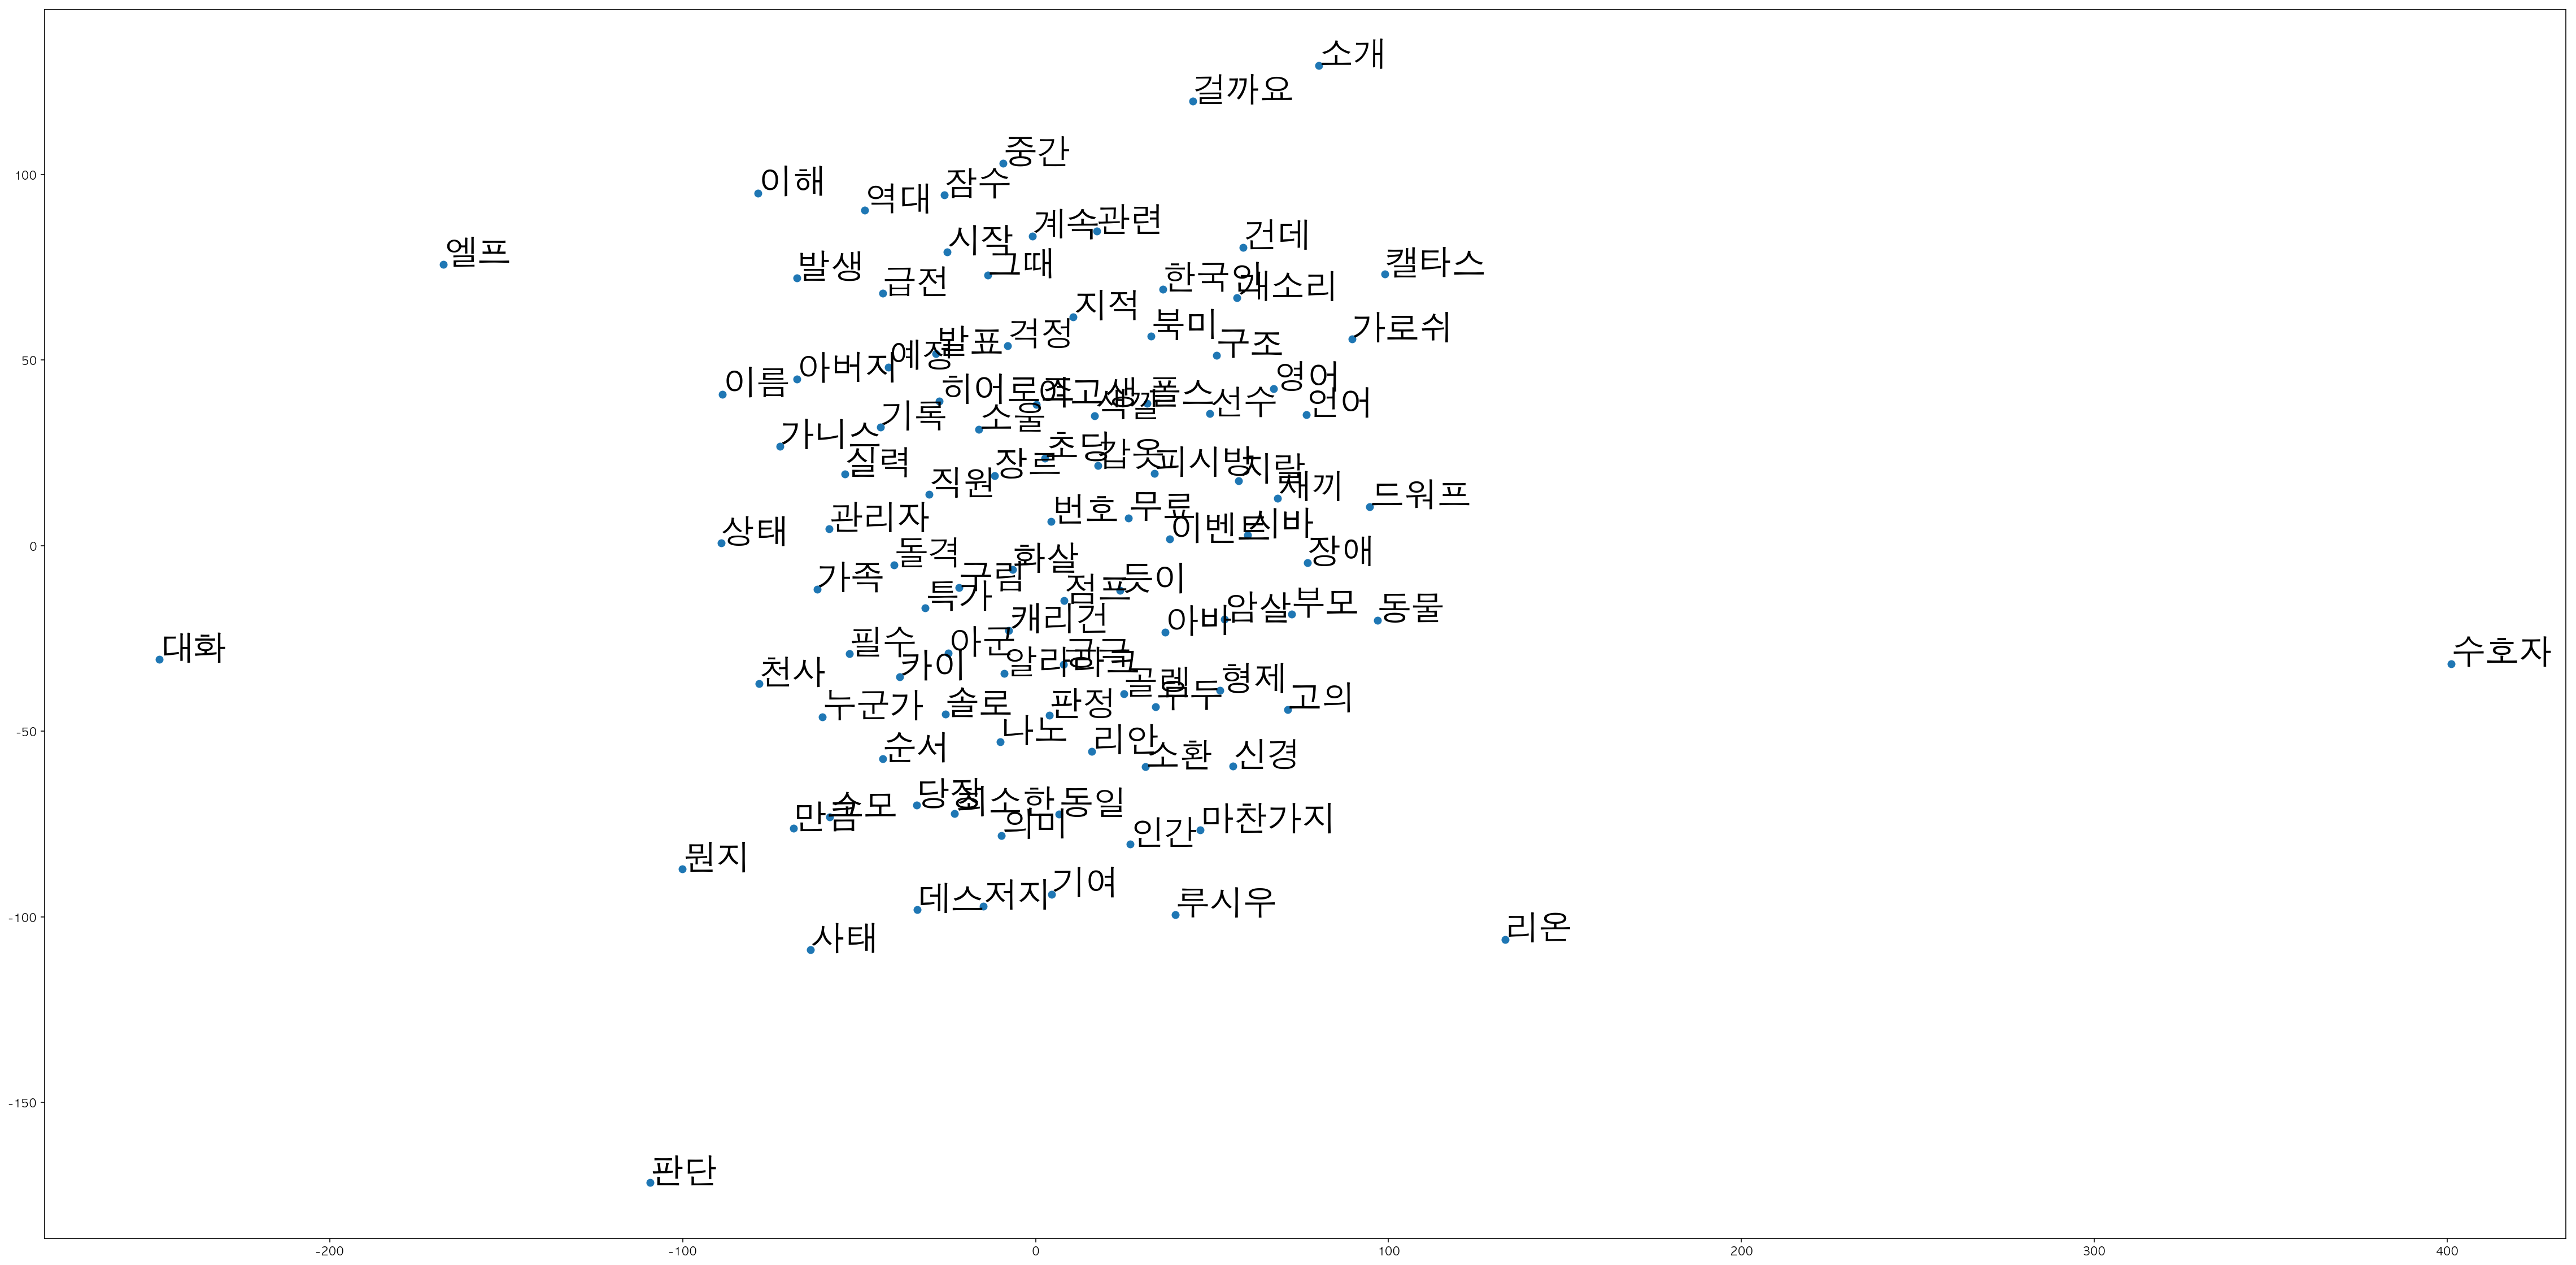

In [73]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()


In [74]:
model.wv['매칭']

array([ 0.12870051,  0.00881612, -0.0370191 ,  0.10974682,  0.06059596,
       -0.18490805, -0.15778159, -0.00942907, -0.0839958 ,  0.03510864,
        0.08237915,  0.02280244, -0.05440823, -0.03665832,  0.01141458,
        0.01447694, -0.04821425, -0.04284547, -0.2792668 ,  0.00267938,
       -0.04159523, -0.24178542, -0.01009896,  0.07145433,  0.13166006,
       -0.0420583 ,  0.22087891,  0.01630934,  0.04307941,  0.0813458 ,
       -0.04413021,  0.08451043, -0.01548696,  0.01011096, -0.12253784,
       -0.09518282, -0.07004979, -0.09298471,  0.0500638 , -0.11011678,
       -0.02772208, -0.12489083,  0.22370113,  0.06715456, -0.19913474,
       -0.02645652, -0.00145195, -0.09410382,  0.11657584,  0.13364664,
        0.185613  ,  0.02866251,  0.00383905, -0.02439969,  0.02387642,
       -0.11875425,  0.01562841, -0.04859933,  0.19381206,  0.01682591,
       -0.09839056,  0.12604839, -0.00030989,  0.00971604, -0.03064652,
        0.0450825 ,  0.14243461, -0.09868295, -0.0838761 , -0.07

In [111]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom', fontsize=20)
    plt.show()

2018-10-24 16:18:06,020 : INFO : collecting all words and their counts
2018-10-24 16:18:06,021 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-10-24 16:18:06,074 : INFO : PROGRESS: at sentence #10000, processed 228912 words, keeping 12570 word types
2018-10-24 16:18:06,166 : INFO : PROGRESS: at sentence #20000, processed 356663 words, keeping 17535 word types
2018-10-24 16:18:06,286 : INFO : PROGRESS: at sentence #30000, processed 468258 words, keeping 21264 word types
2018-10-24 16:18:06,390 : INFO : PROGRESS: at sentence #40000, processed 586827 words, keeping 24082 word types
2018-10-24 16:18:06,424 : INFO : PROGRESS: at sentence #50000, processed 699685 words, keeping 26497 word types
2018-10-24 16:18:06,462 : INFO : PROGRESS: at sentence #60000, processed 806391 words, keeping 28469 word types
2018-10-24 16:18:06,503 : INFO : PROGRESS: at sentence #70000, processed 915966 words, keeping 30405 word types
2018-10-24 16:18:06,558 : INFO : PROGRESS: at 

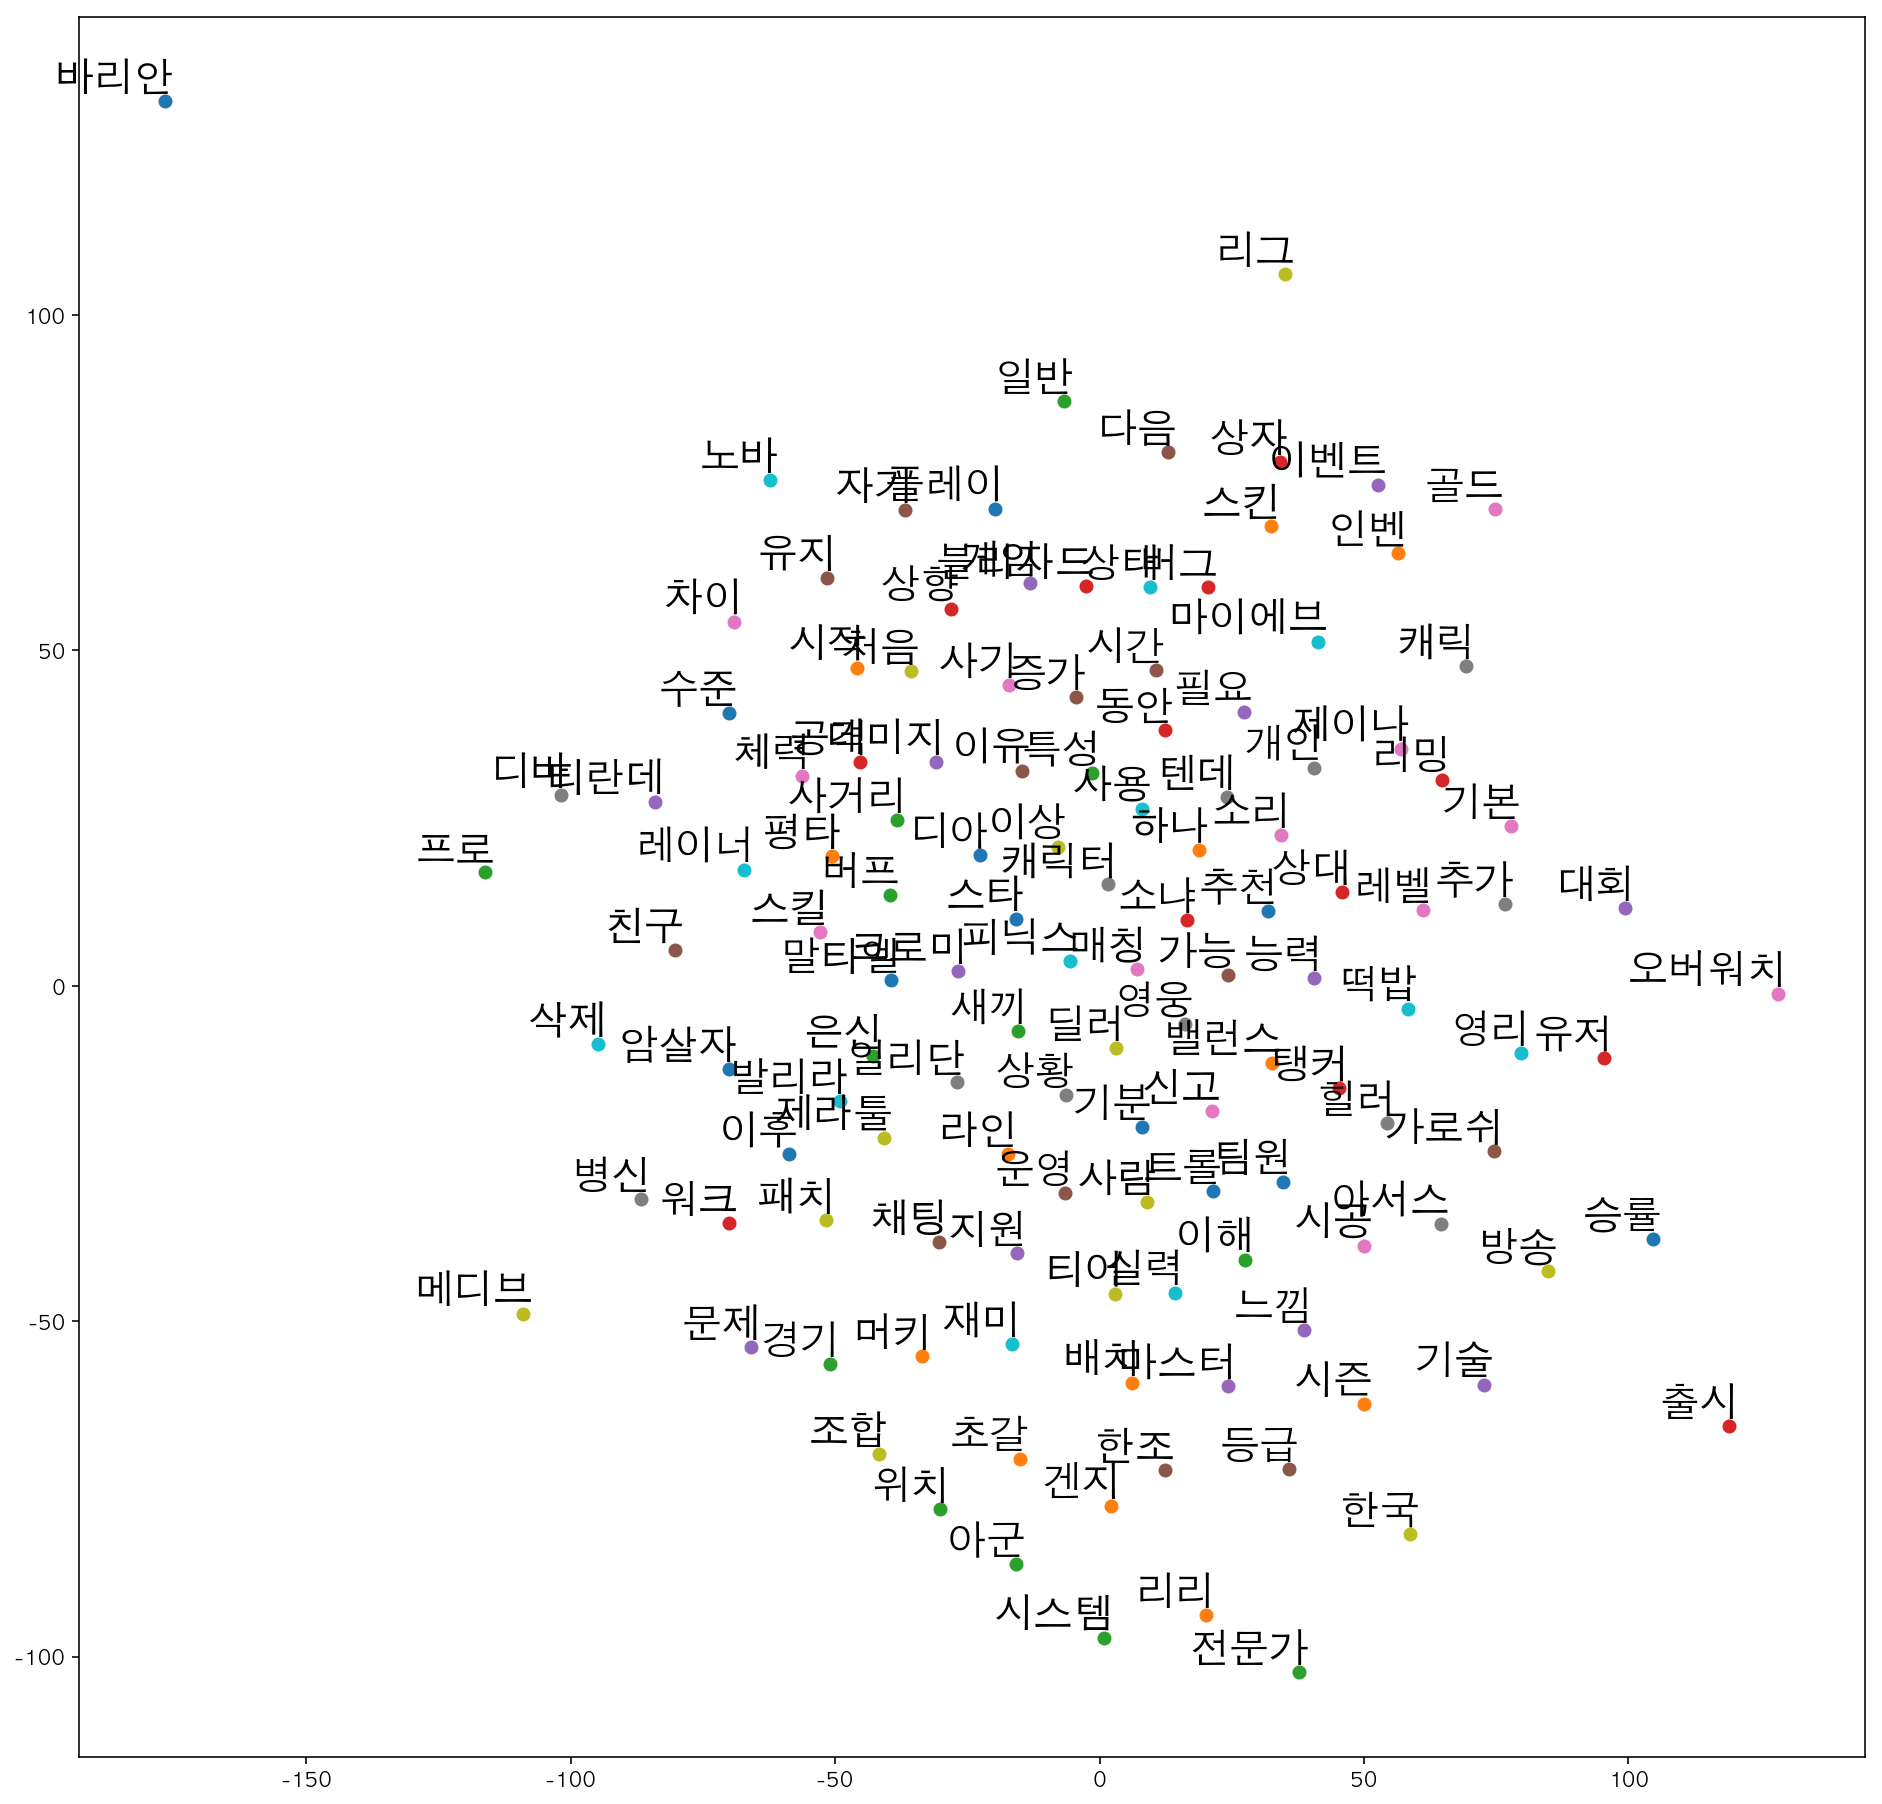

In [115]:
model = word2vec.Word2Vec(word2vec_list, size=100, window=10, min_count=2000, sg=1)
tsne_plot(model)

In [129]:
model.wv.most_similar('영리')

[('배치', 0.662330150604248),
 ('실력', 0.6061338186264038),
 ('시즌', 0.5976729989051819),
 ('매칭', 0.5949913263320923),
 ('조합', 0.5806419849395752),
 ('티어', 0.5785012245178223),
 ('마스터', 0.5752208232879639),
 ('유저', 0.5517653226852417),
 ('골드', 0.5425344705581665),
 ('사람', 0.5288385152816772)]